In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import scipy.io as sio
import csv
import pylab as plt
import random

In [3]:
def save_prediction(pred, filename):
    """
    Save the output of the regression as csv file
    """
    pred=pred.flatten()
    totalRows = pred.shape[0] 
    filename = filename+'.csv'
    with open(filename, mode = 'w') as result:
        csv_writer = csv.writer(result, delimiter=',', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow(['dataid', 'prediction'])
        
        for i in range(totalRows):
             csv_writer.writerow([str(i+1), pred[i]])

In [4]:
mat_contents = sio.loadmat(file_name='/Users/a_dykim/Google_drive/Columbia/Fall2018/Classes/ML/MSdata.mat')
#mat_contents

In [5]:
test_x = mat_contents['testx']
train_x = mat_contents['trainx']
train_y = mat_contents['trainy']

In [6]:
# OLS (there are no penalty terms)
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
test_pred_y = reg.predict(test_x)

In [7]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(train_x, train_y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [8]:
ridge_pred_y = ridge.predict(test_x)

In [9]:
lasso = linear_model.Lasso(alpha=0.2)
lasso.fit(train_x, train_y)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
lasso_pred_y = lasso.predict(test_x)

In [11]:
elastic = linear_model.ElasticNet(alpha=0.5, l1_ratio=0.3)
elastic.fit(train_x, train_y)

ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
elastic_pred_y = elastic.predict(test_x)

In [13]:
bayes = linear_model.BayesianRidge()
bayes.fit(train_x, train_y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [14]:
bayes_pred_y = bayes.predict(test_x)

In [33]:
save_prediction(ridge_pred_y, 'ridge_result')

### Feature selection

In [71]:
nsamp = 200
sample_index = random.sample(range(len(test_x)), nsamp)
subtest_x = train_x[sample_index,:]
subtest_y = train_y[sample_index]

In [64]:
subtest_x.shape

(10000, 90)

(array([1.000e+00, 2.000e+00, 3.600e+01, 1.700e+02, 9.300e+02, 3.699e+03,
        3.935e+03, 1.005e+03, 1.920e+02, 3.000e+01]),
 array([-28.55339 , -23.837525, -19.12166 , -14.405795,  -9.68993 ,
         -4.974065,  -0.2582  ,   4.457665,   9.17353 ,  13.889395,
         18.60526 ]),
 <a list of 10 Patch objects>)

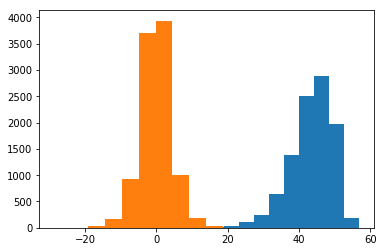

In [68]:
plt.hist(subtest_x[:,0])
plt.hist(subtest_x[:,10])
#plt.hist(subtest_x[:,20])

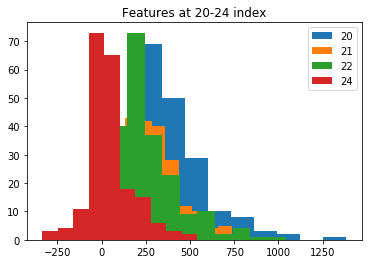

In [83]:
plt.hist(subtest_x[:,20], label='20')
plt.hist(subtest_x[:,21], label='21')
plt.hist(subtest_x[:,22], label='22')
plt.hist(subtest_x[:,24], label='24')
plt.title('Features at 20-24 index')
plt.legend()

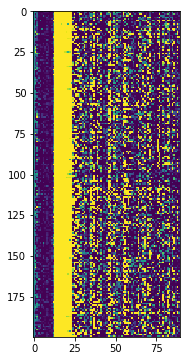

In [107]:
plt.figure(figsize=(10,6))
imshow(subtest_x, vmin=0, vmax=100)

In [116]:
low_saturated= np.where(subtest_x<0)[1]

In [194]:
def remove_similar_feature_row(train_x, train_y, cutoff=100):
    """
    Go through test sample and remove data point with indistingishable features
    """
    std_features = np.std(train_x, axis=1)
    index = np.where(std_features>cutoff)
    X = train_x.copy()[index]
    Y = train_y.copy()[index]
    return X, Y

In [195]:
traincut_x, traincut_y= remove_similar_feature_row(train_x, train_y)

In [196]:
regcut = linear_model.LinearRegression()
regcut.fit(traincut_x, traincut_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [197]:
testcut_pred_y = regcut.predict(test_x)

In [198]:
save_prediction(testcut_pred_y, 'cut_linearreg')

In [199]:
bayes_cut = linear_model.BayesianRidge()
bayes_cut.fit(traincut_x, traincut_y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [200]:
bayescut_pred_y = bayes_cut.predict(test_x)

In [201]:
save_prediction(bayescut_pred_y, 'cut_bayes')

In [135]:
len(np.where(low_saturated == 10)[0])

103

(array([ 7., 15., 37., 56., 37., 29., 12.,  3.,  2.,  2.]),
 array([-32.92198 , -24.792712, -16.663444,  -8.534176,  -0.404908,
          7.72436 ,  15.853628,  23.982896,  32.112164,  40.241432,
         48.3707  ]),
 <a list of 10 Patch objects>)

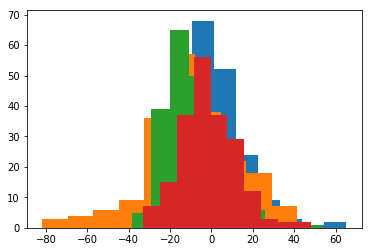

In [131]:
plt.hist(subtest_x[:,3])
plt.hist(subtest_x[:,4])
plt.hist(subtest_x[:,5])
plt.hist(subtest_x[:,6])

(array([62., 84., 36., 11.,  4.,  1.,  0.,  0.,  0.,  2.]),
 array([ 163.99044 ,  639.685289, 1115.380138, 1591.074987, 2066.769836,
        2542.464685, 3018.159534, 3493.854383, 3969.549232, 4445.244081,
        4920.93893 ]),
 <a list of 10 Patch objects>)

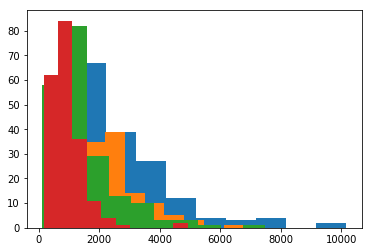

In [115]:
plt.hist(subtest_x[:,13])
plt.hist(subtest_x[:,14])
plt.hist(subtest_x[:,15])
plt.hist(subtest_x[:,16])


In [111]:
subtest_x[:,13].shape

(200,)

In [108]:
len(np.where(saturated == 13)[0])

175

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable 

In [9]:
train_y = train_y.astype('int32')

In [10]:
trainx = torch.from_numpy(train_x)
trainy = torch.from_numpy(train_y)

In [28]:
batch_size = 100

X = torch.from_numpy(train_x).double()
y = torch.from_numpy(train_y).double()

#train_data = torch.utils.data.TensorDataset(X, y)
#train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

X = Variable(X).float()
y = Variable(y).float()
#type(torch.LongTensor)
train_data = torch.utils.data.TensorDataset(X, y)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [74]:
lin = nn.Linear(90,1)
opt = torch.optim.SGD(lin.parameters(), lr=0.1)
loss_fn = F.mse_loss
loss = loss_fn(lin(X), y)

In [41]:
torch.nn.utils.clip_grad_norm_(lin.parameters(), 0.25)

0.0

In [56]:
def get_batch(source, i):
    bptt=20000
    seq_len = min(bptt, len(source) - 1 - i)
    data = source[i:i+seq_len]
    target = source[i+1:i+1+seq_len]
    return data, target

In [62]:
def fit(num_epochs, model, loss_fn, opt):
    # Define a utility function to train the model
    for epoch in range(num_epochs):
        for xb,yb in train_loader:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 0.25)
            opt.step()
            opt.zero_grad()
    print('Training loss: ', loss_fn(model(X), y))

In [ ]:
fit(1000, lin, loss_fn, opt)

In [76]:
testx = torch.from_numpy(test_x).double()
testX = Variable(testx).float()

In [ ]:
pred = lin(testX)

In [ ]:
pred

In [80]:
test_pred_y

array([[1994.88486982],
       [2002.6269286 ],
       [2000.911244  ],
       ...,
       [1996.98609964],
       [2001.89239022],
       [1999.71164534]])

In [ ]:
def get_batch(source, i):
    seq_len = min(args.bptt, len(source) - 1 - i)
    data = source[i:i+seq_len]
    target = source[i+1:i+1+seq_len].view(-1)
    return data, target

def train():
    # Turn on training mode which enables dropout.
    X.train()
    total_loss = 0.
    start_time = time.time()
    ntokens = len(corpus.dictionary)
    hidden = model.init_hidden(args.batch_size)
    for batch, i in enumerate(range(0, train_data.size(0) - 1, args.bptt)):
        data, targets = get_batch(train_data, i)
        # Starting each batch, we detach the hidden state from how it was previously produced.
        # If we didn't, the model would try backpropagating all the way to start of the dataset.
        hidden = repackage_hidden(hidden)
        model.zero_grad()
        output, hidden = model(data, hidden)
        loss = criterion(output.view(-1, ntokens), targets)
        loss.backward()

        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        torch.nn.utils.clip_grad_norm_(model.parameters(), args.clip)
        for p in model.parameters():
            p.data.add_(-lr, p.grad.data)

        total_loss += loss.item()

        if batch % args.log_interval == 0 and batch > 0:
            cur_loss = total_loss / args.log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | lr {:02.2f} | ms/batch {:5.2f} | '
                    'loss {:5.2f} | ppl {:8.2f}'.format(
                epoch, batch, len(train_data) // args.bptt, lr,
                elapsed * 1000 / args.log_interval, cur_loss, math.exp(cur_loss)))
            total_loss = 0
            start_time = time.time()

In [25]:
# Save the result into 'result.csv'

totalRows = test_pred_y.shape[0]
with open('result.csv', mode='w') as result_file:
    csv_writer = csv.writer(result_file, delimiter=',', quoting=csv.QUOTE_MINIMAL)
    
    csv_writer.writerow(['dataid','prediction'])
    
    for i in range(totalRows):
        csv_writer.writerow([str(i+1),test_pred_y[i][0]])
    

IndexError: invalid index to scalar variable.